In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import datasets  #Scikit Learn have some prebuilt models we will be using

In [3]:
#The housing dataset is used here
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [4]:
#Converting the dataset into a tabular format
housing_df = pd.DataFrame(data=housing.data,columns=housing.feature_names)

housing_df['HousePrice'] = housing.target
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
#Predicting price of a house based on attributes given
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [7]:
#Check for null values in the dataset
housing_df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
HousePrice    0
dtype: int64

C:\Apps\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


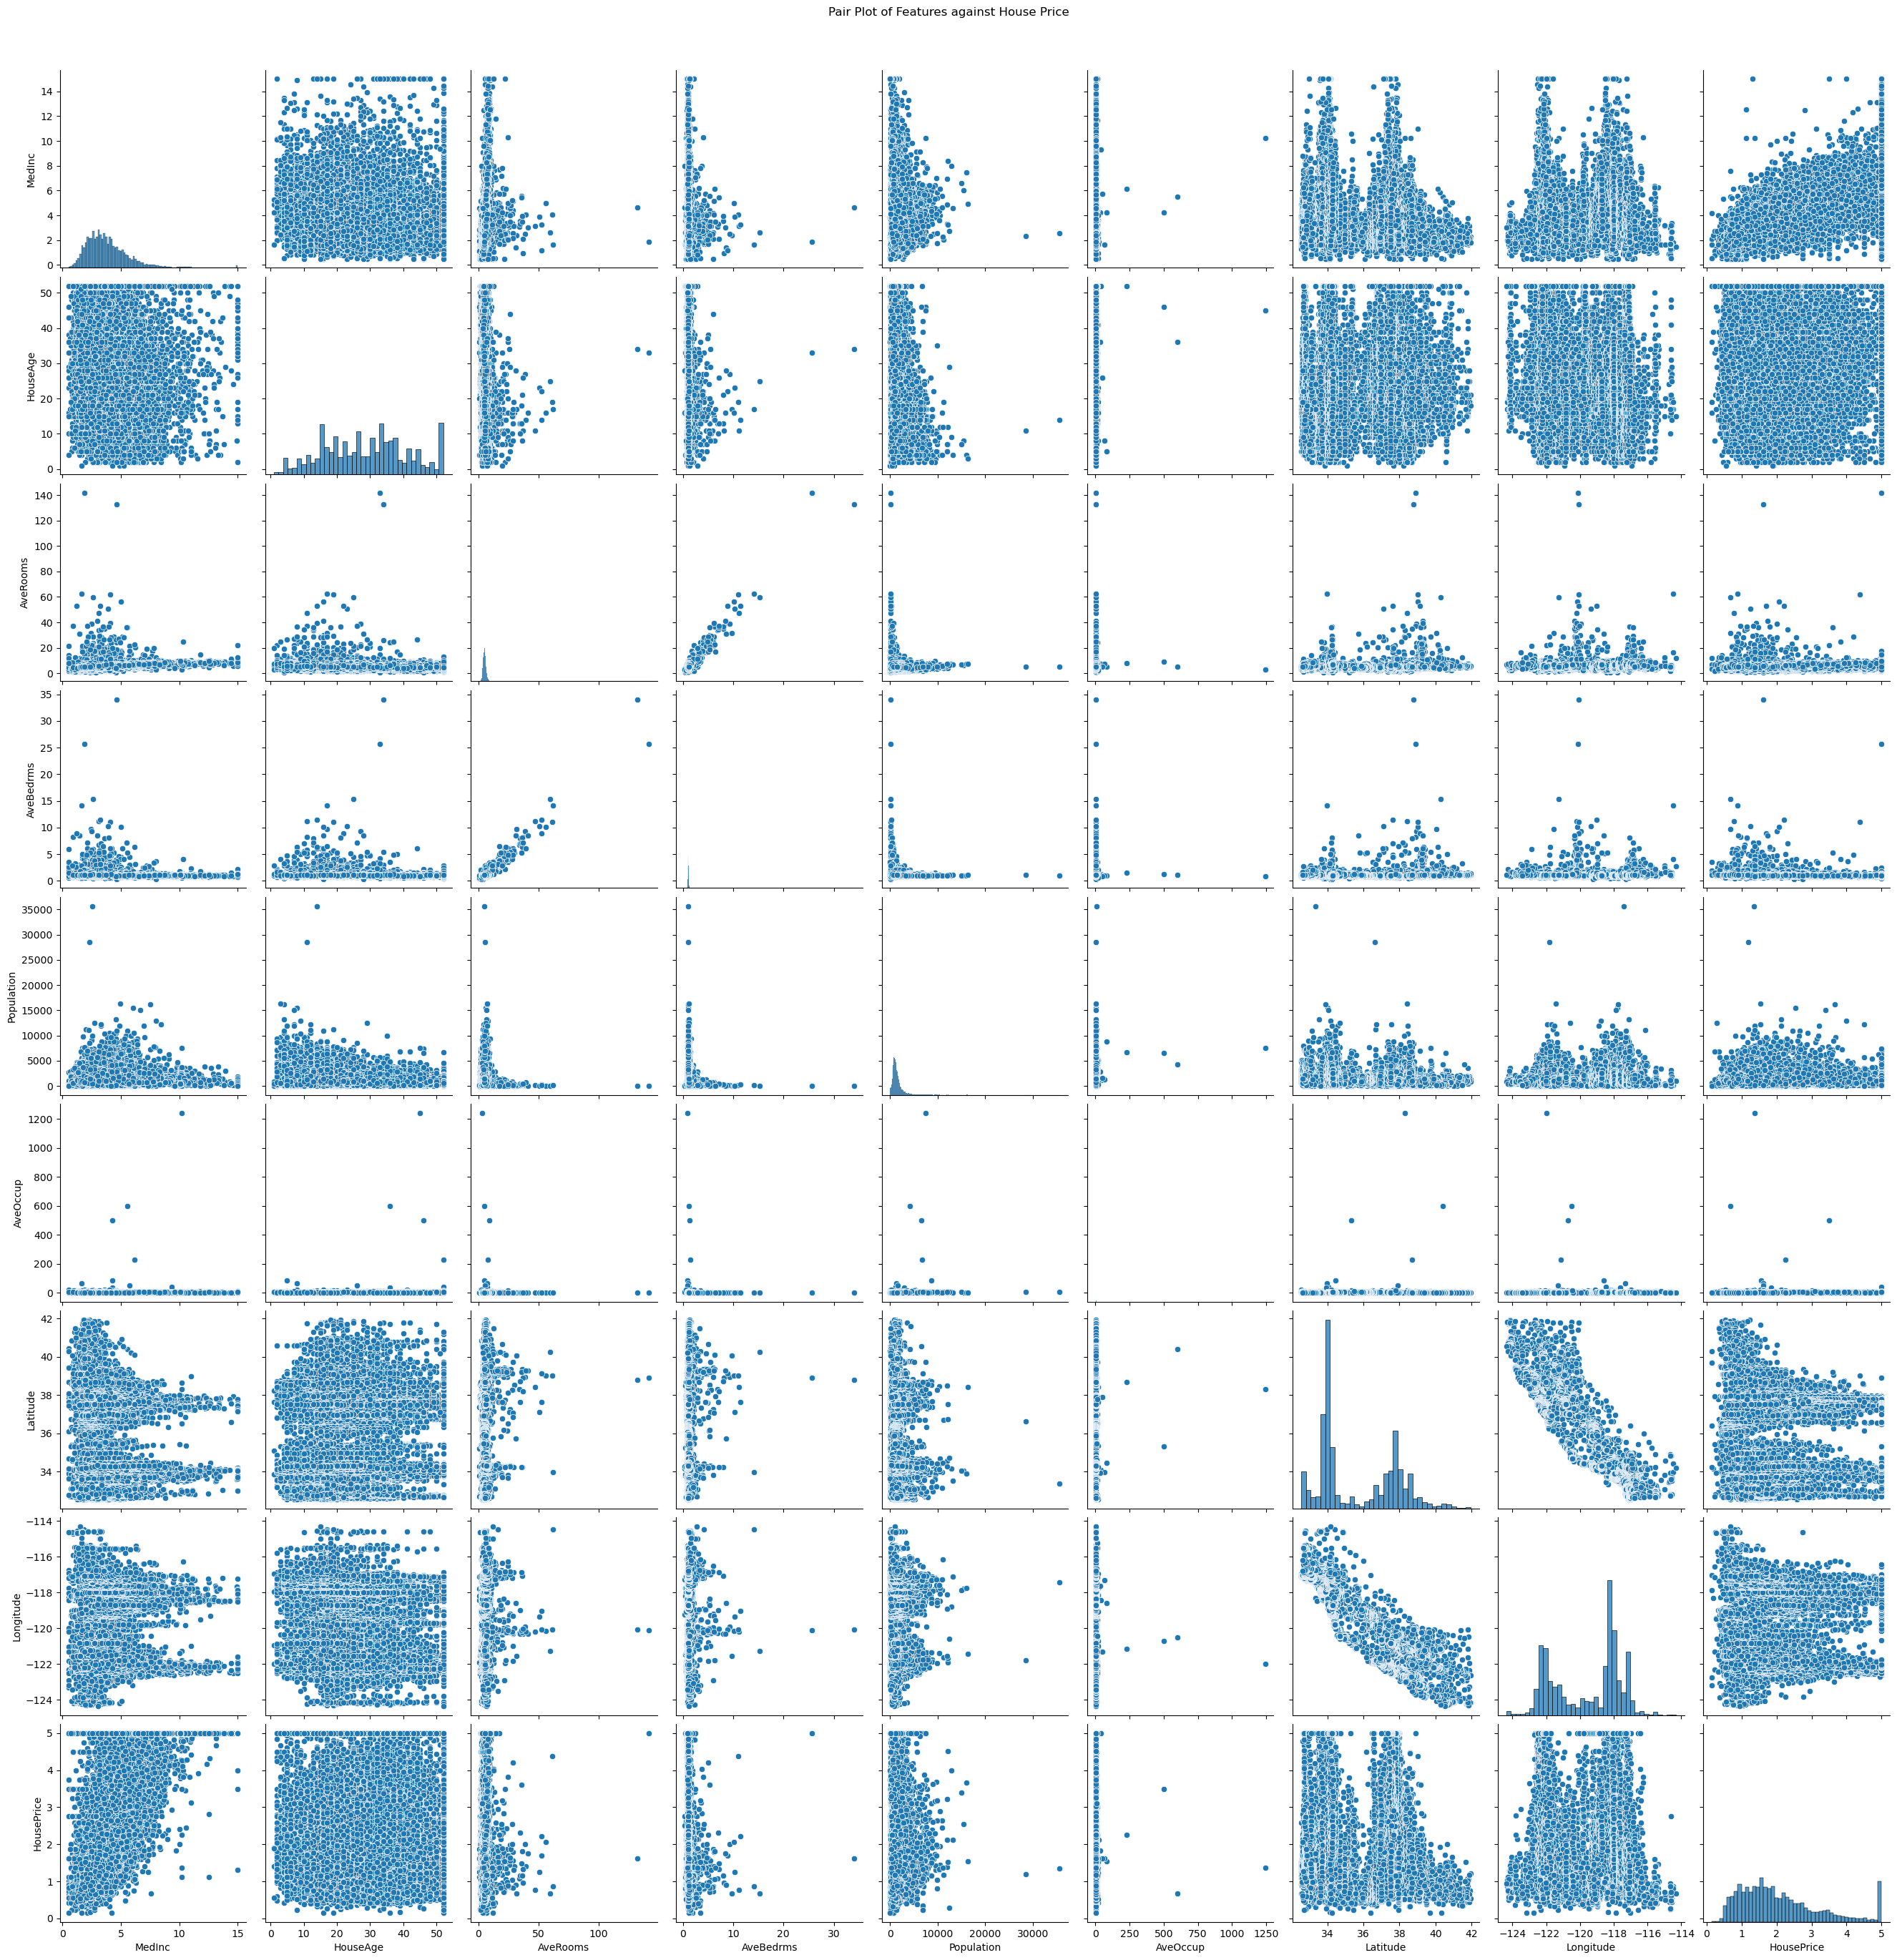

In [9]:
#Pairwise relation between housing features against house price using a pair plot
sns.pairplot(housing_df, height=3)
plt.suptitle('Pair Plot of Features against House Price',y=1.02)
plt.show()

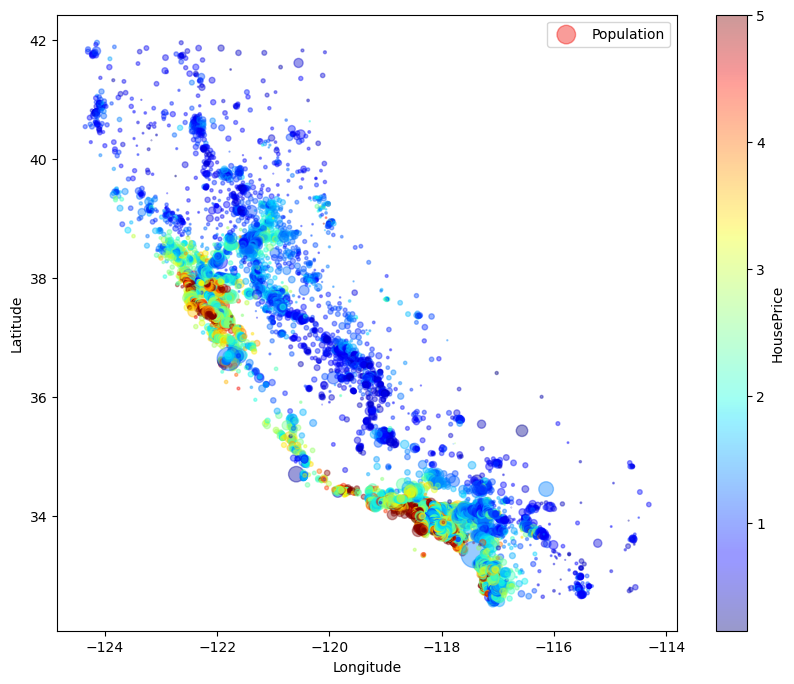

In [15]:
#Geographic Distribution of Datapoints based on longitude and latitude
#Size indidcates population and size implies house price
housing_df.plot(
kind="scatter",
x="Longitude",
y="Latitude",
alpha=0.4,
s=housing_df['Population']/100,
label="Population",
c="HousePrice",
cmap="jet",
colorbar=True,
figsize=(10,8)
)
plt.show()
#Red shows houses closes to ocean

<Axes: >

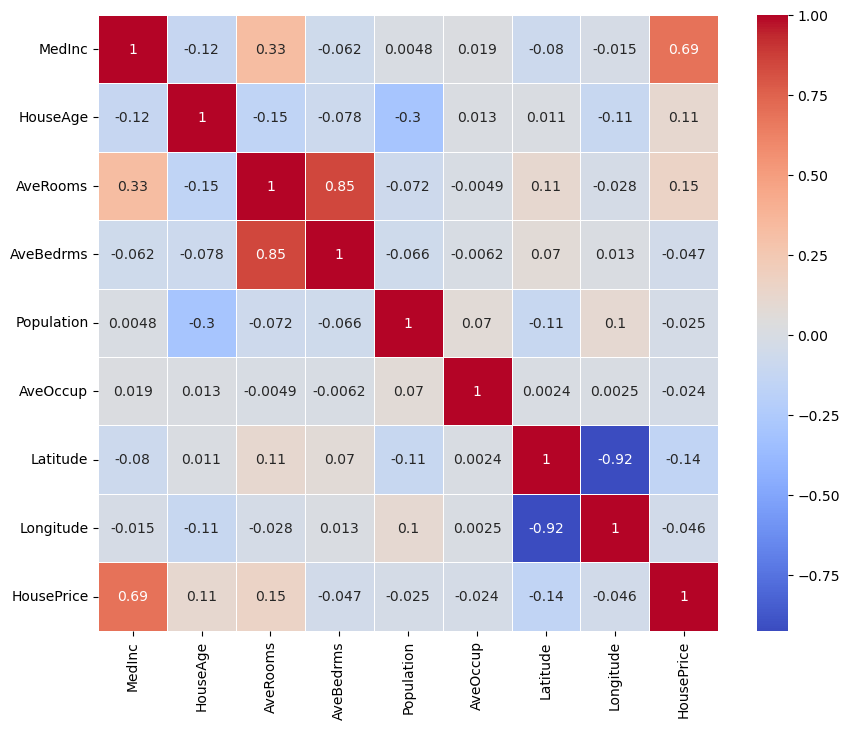

In [16]:
#Multicollinerarity with Inflation Factors using a Heatmap
corr = housing_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True, cmap="coolwarm",linewidth=0.5)

In [18]:
#Absolute Correlation values of house prices in descending order
corr["HousePrice"].abs().sort_values(ascending=False)
#Inference: Medical Insurance greatly determines House Price

HousePrice    1.000000
MedInc        0.688075
AveRooms      0.151948
Latitude      0.144160
HouseAge      0.105623
AveBedrms     0.046701
Longitude     0.045967
Population    0.024650
AveOccup      0.023737
Name: HousePrice, dtype: float64

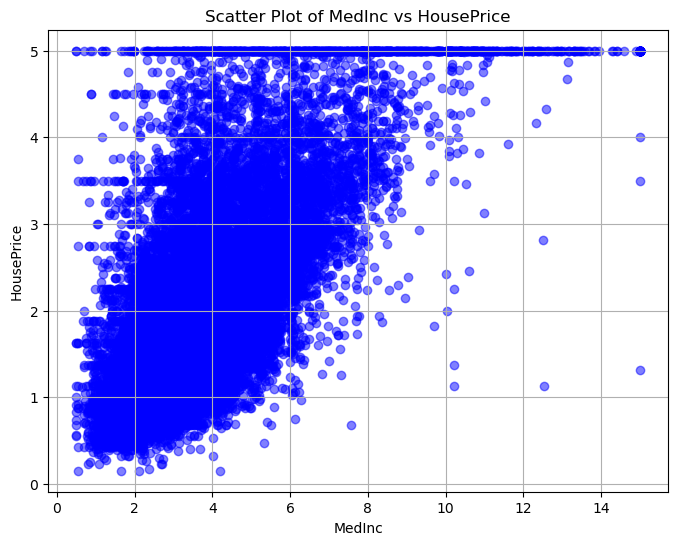

In [19]:
#Scatter plot between medical insurance and house price
medinc = housing_df['MedInc']
houseprice = housing_df['HousePrice']

plt.figure(figsize=(8,6))
plt.scatter(medinc,houseprice, alpha=0.5, color='blue')
plt.title("Scatter Plot of MedInc vs HousePrice")
plt.xlabel('MedInc')
plt.ylabel('HousePrice')
plt.grid(True)
plt.show()

In [25]:
#Variance Inflation Factor (VIF) for each feature to identify multicolinearity
#VIF help correlation between predictors and drop features
from statsmodels.stats.outliers_influence import variance_inflation_factor

housing_df_vif = housing_df.drop('HousePrice',axis=1)
housing_df_vif = housing_df_vif.apply(pd.to_numeric, errors='coerce')

vif_data =pd.DataFrame()
vif_data["Feature"] = housing_df_vif.columns
vif_data["VIF"] = [variance_inflation_factor(housing_df_vif.values, i) for i in range(len(housing_df_vif.columns))]
print(vif_data)
#Latitude and Longitude hav high VIF values indicating high multicollinearity issues with other predictors

      Feature         VIF
0      MedInc   11.511140
1    HouseAge    7.195917
2    AveRooms   45.993601
3   AveBedrms   43.590314
4  Population    2.935745
5    AveOccup    1.095243
6    Latitude  559.874071
7   Longitude  633.711654


In [27]:
housing_df = housing_df.drop(['Latitude','Longitude'],axis=1)

In [28]:
#Convert housing dataframe into numeric values and add a constant and fit an OLS Regression using statsmodel
cols_to_convert = ['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup']
housing_df[cols_to_convert] = housing_df[cols_to_convert].apply(pd.to_numeric, errors='coerce')
housing_df['HousePrice'] = pd.to_numeric(housing_df['HousePrice'],errors='coerce')

x=sm.add_constant(housing_df.drop('HousePrice',axis=1))
y=housing_df['HousePrice']

model = sm.OLS(y,x).fit()

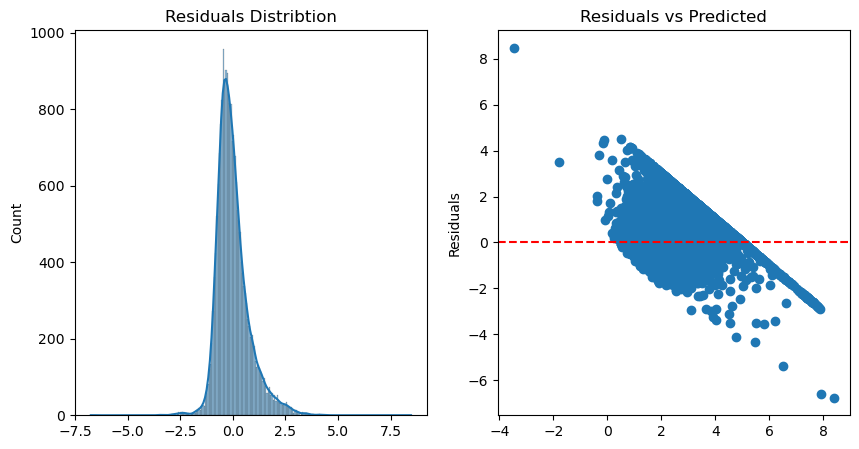

Model Coefficients:
 const        -0.439093
MedInc        0.536910
HouseAge      0.016503
AveRooms     -0.211740
AveBedrms     0.993730
Population    0.000022
AveOccup     -0.004877
dtype: float64


In [33]:
#Residual analysis to validate linear regression assumptions
#Visualise the distribution of residuals and their relation with predicted values
#Significnace of model coefficaents to understand how each feature influences the target variable
residuals = model.resid

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribtion")

plt.subplot(1, 2, 2)
plt.scatter(model.predict(x),residuals)
plt.axhline(y=0,color="red",linestyle='--')
plt.title("Residuals vs Predicted")
plt.ylabel('Residuals')
plt.show()

print("Model Coefficients:\n",model.params)
#Histogram shows normal distribution showing somewhat residuals or outliers
#Scatter plot shows residuals against predicted values and random scatter must lie near the zero.
#Model coefficient indicates impact of each feature on the house price.

In [35]:
#Compute and interpret the R^2 and MSE metrics to valuate the linear regression model on the housing data
#R^2 measures the proportion of variance in the dependent variables explained by the independent variables
#MSE quantifies the average square differnce betweeen the predicted and average values
from sklearn.metrics import mean_squared_error,r2_score

predictions = model.predict(x)

print("R Square Score: ",r2_score(y, predictions))
print("Mean Squared Error: ",mean_squared_error(y, predictions))
#Inference: Shows 54% on the dependent variable and MSE of 0.612 indicating moderate predictive performance

R Square Score:  0.5396977345638283
MSE:  0.6129156196698703


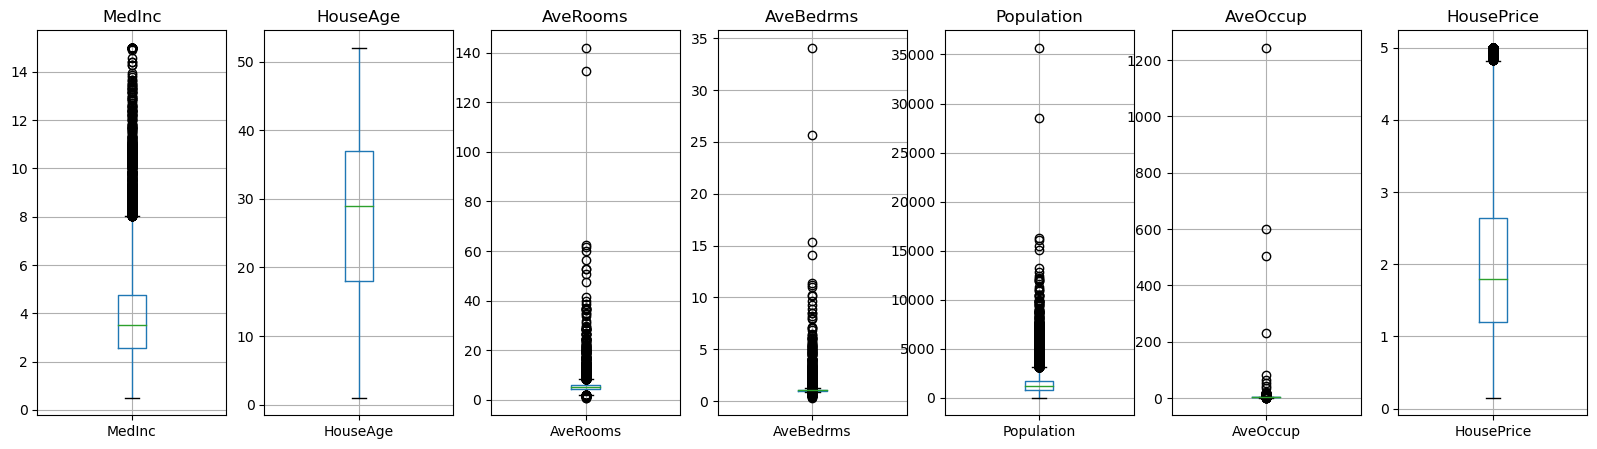

In [36]:
#Distribution of several predictor and target variables using boxplot to identify potential outliers
import matplotlib.pyplot as plt
def plot_boxplots(df):
    fid,axes = plt.subplots(1, len(df.columns),figsize=(20, 5))
    
    for i, column_name in enumerate(df.columns):
        df.boxplot(column=column_name,ax=axes[i])
        axes[i].set_title(column_name)
        
    plt.show()
    
plot_boxplots(housing_df)
#Inference: Outliers affect model performance and essentail to address them for improved model accuracy

In [42]:
#Remove Outliers by calculating the lower and upper bounds based on the intercordal range and replaced the outliers with these bounds
#This helps to retain valuable information by outliers
def remove_outliers(df):
    df_no_outliers = df.copy()
    
    for column_name in df.columns:
        Q1 = df[column_name].quantile(0.25)
        Q3  = df[column_name].quantile(0.75)
        
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
        
        df_no_outliers[column_name] = df_no_outliers[column_name].apply(lambda x:lower_bound if x < lower_bound
                                                                       else upper_bound if x > upper_bound else x)
        return df_no_outliers
    
housing_df_new = remove_outliers(housing_df)

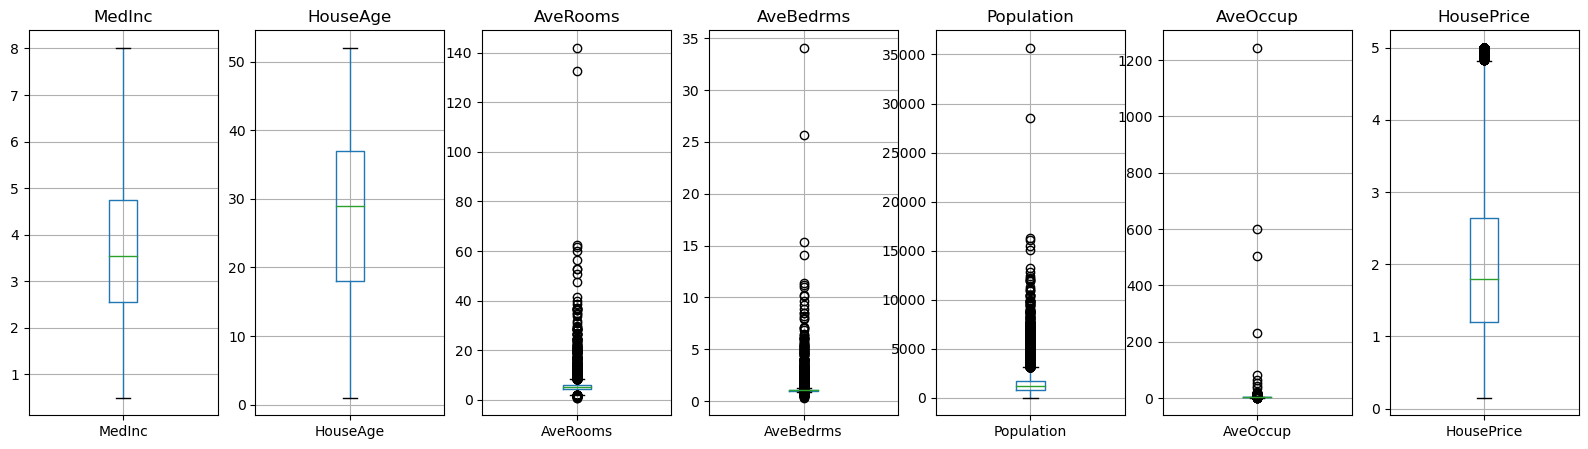

In [43]:
#Visulisation of predictors and data from the clesned adata frame
#Using boxplot to show impact of removal of outliers
plot_boxplots(housing_df_new)

In [45]:
#Fitting of the linear regression on the cleansed dataset
cols_to_convert = ['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup']
housing_df_new[cols_to_convert] = housing_df_new[cols_to_convert].apply(pd.to_numeric, errors='coerce')
housing_df_new['HousePrice'] = pd.to_numeric(housing_df_new['HousePrice'],errors='coerce')

x=sm.add_constant(housing_df_new.drop('HousePrice',axis=1))
y=housing_df_new['HousePrice']

model = sm.OLS(y,x).fit()

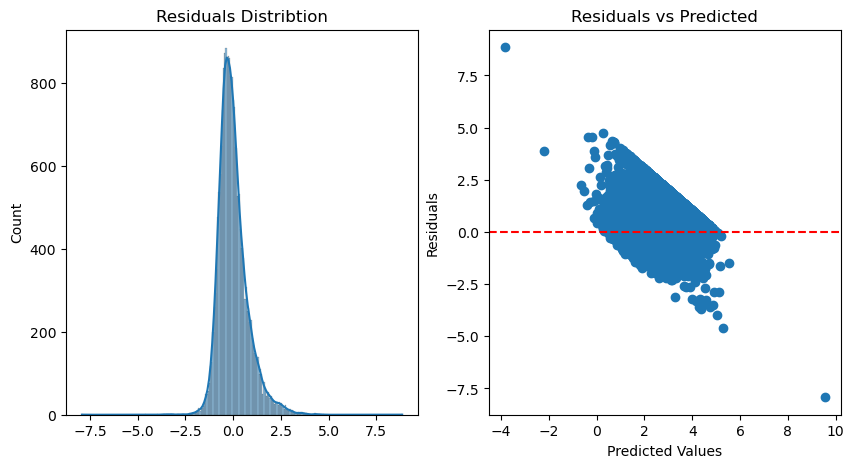

Model Coefficients:
 const        -0.822066
MedInc        0.636220
HouseAge      0.018196
AveRooms     -0.235729
AveBedrms     1.117237
Population    0.000014
AveOccup     -0.004408
dtype: float64


In [46]:
residuals = model.resid

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribtion")

plt.subplot(1, 2, 2)
plt.scatter(model.predict(x),residuals)
plt.axhline(y=0,color="red",linestyle='--')
plt.title("Residuals vs Predicted")
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

print("Model Coefficients:\n",model.params)
#Inference: Histogram shows a bell shaped distribution that is tighter and more symmetric as the outliers have been removed
#Scatter plot shows more evenly distributed plot close to the zero line consistant coefficante varaitaion
#Average bedrroms shows highest model coefficent and avergae rooms having negative impacts

In [47]:
from sklearn.metrics import mean_squared_error,r2_score

predictions = model.predict(x)

print("R Square Score: ",r2_score(y, predictions))
print("Mean Squared Error: ",mean_squared_error(y, predictions))
#Inference: Shows 54% on the dependent variable and MSE of 0.612 indicating moderate predictive performance

R Square Score:  0.5530491878554835
Mean Squared Error:  0.5951374880328386
